In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv', encoding = 'latin1')

In [3]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Seasons  ...         NaN   
2  September 24, 2021          2021  TV-MA   1 Season  ...         NaN   
3  September 24, 2021          2021  TV-MA   1 Season  ...         NaN   
4  September 24, 2021          2021  TV-MA  2 Seasons  ...         NaN   

  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [5]:
# Remove columns with missing values from the dataset

df = df.drop(columns = ['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

'director', 'cast' and 'country' have missing values so i have filled the missing values as unknown 

for columns 'date_added', 'release_year', and 'rating' i have removed the rows for missing values


In [9]:
df['director'].fillna('unknown', inplace = True)
df['cast'].fillna('unknown', inplace = True)
df['country'].fillna('unknown', inplace = True)

In [10]:
df.dropna(subset = ['date_added', 'rating', 'duration'], inplace = True)

In [11]:
# Check the count of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8792 non-null   object
 1   type          8792 non-null   object
 2   title         8792 non-null   object
 3   director      8792 non-null   object
 4   cast          8792 non-null   object
 5   country       8792 non-null   object
 6   date_added    8792 non-null   object
 7   release_year  8792 non-null   int64 
 8   rating        8792 non-null   object
 9   duration      8792 non-null   object
 10  listed_in     8792 non-null   object
 11  description   8792 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.9+ KB


# Data Visualization

# Are there more movies or TV shows on Netflix

In [12]:
size = df['type'].value_counts()
label1 = 'Movies', 'Tv Shows'
color1 = sns.color_palette("Set2")

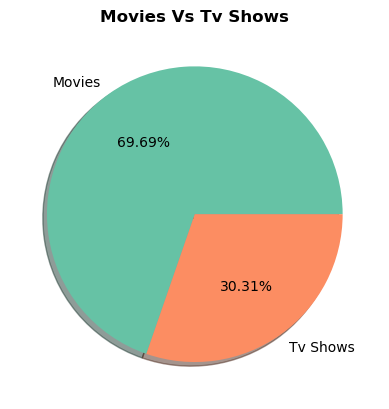

In [13]:
plt.pie(size, colors = color1, labels = label1, autopct = '%1.2f%%', shadow = bool)
plt.title("Movies Vs Tv Shows", fontweight = 'bold')
plt.show()

Movies clearly overcount TV Shows

1) Which Country have the most films produced on Netflix?
2) Which Country have the most TV shows produced on Netflix?
3) Which countries have the most products on Netflix?

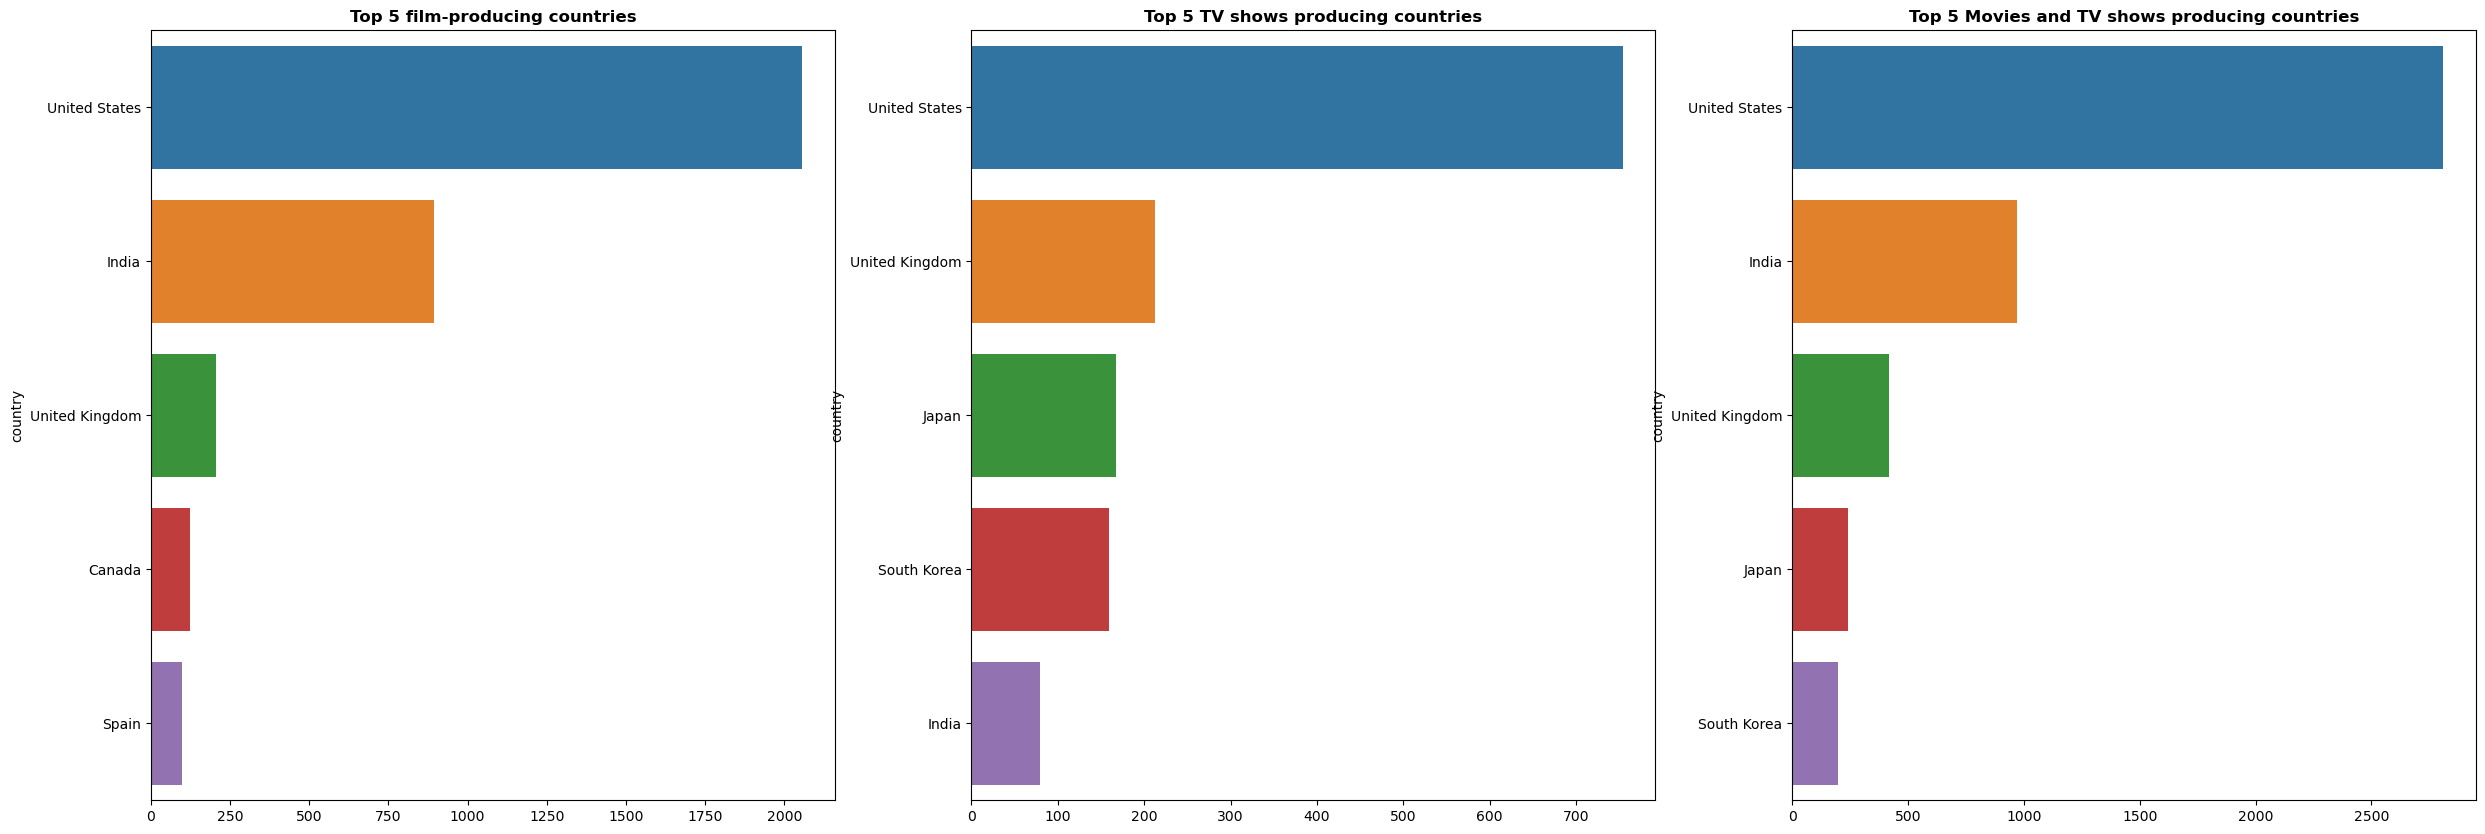

In [14]:
movies = df[(df['type']) == 'Movie']
movies = movies[movies.country != 'unknown']
top_country_movies = movies.country.value_counts().nlargest(5).sort_values(ascending = False)

tv_shows = df[(df['type']) == 'TV Show']
tv_shows = tv_shows[tv_shows.country != 'unknown']
top_country_tv_shows = tv_shows.country.value_counts().nlargest(5).sort_values(ascending = False)

df = df[df.country != 'unknown']

fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].set_title("Top 5 film-producing countries", fontweight = 'bold')
sns.barplot(data = movies, x = top_country_movies.values, y= top_country_movies.index, ax=ax[0])

ax[1].set_title("Top 5 TV shows producing countries", fontweight = 'bold')
sns.barplot(data = tv_shows, x = top_country_tv_shows.values, y= top_country_tv_shows.index, ax=ax[1])

ax[2].set_title("Top 5 Movies and TV shows producing countries", fontweight = 'bold')
sns.barplot(data = df, x = df.country.value_counts().nlargest(5).sort_values(ascending = False).values, y = df.country.value_counts().nlargest(5).sort_values(ascending = False).index)

plt.show()


1) Who are the most popular movies directors on netflix?
2) Who are the most popular TV shows directors on netflix?

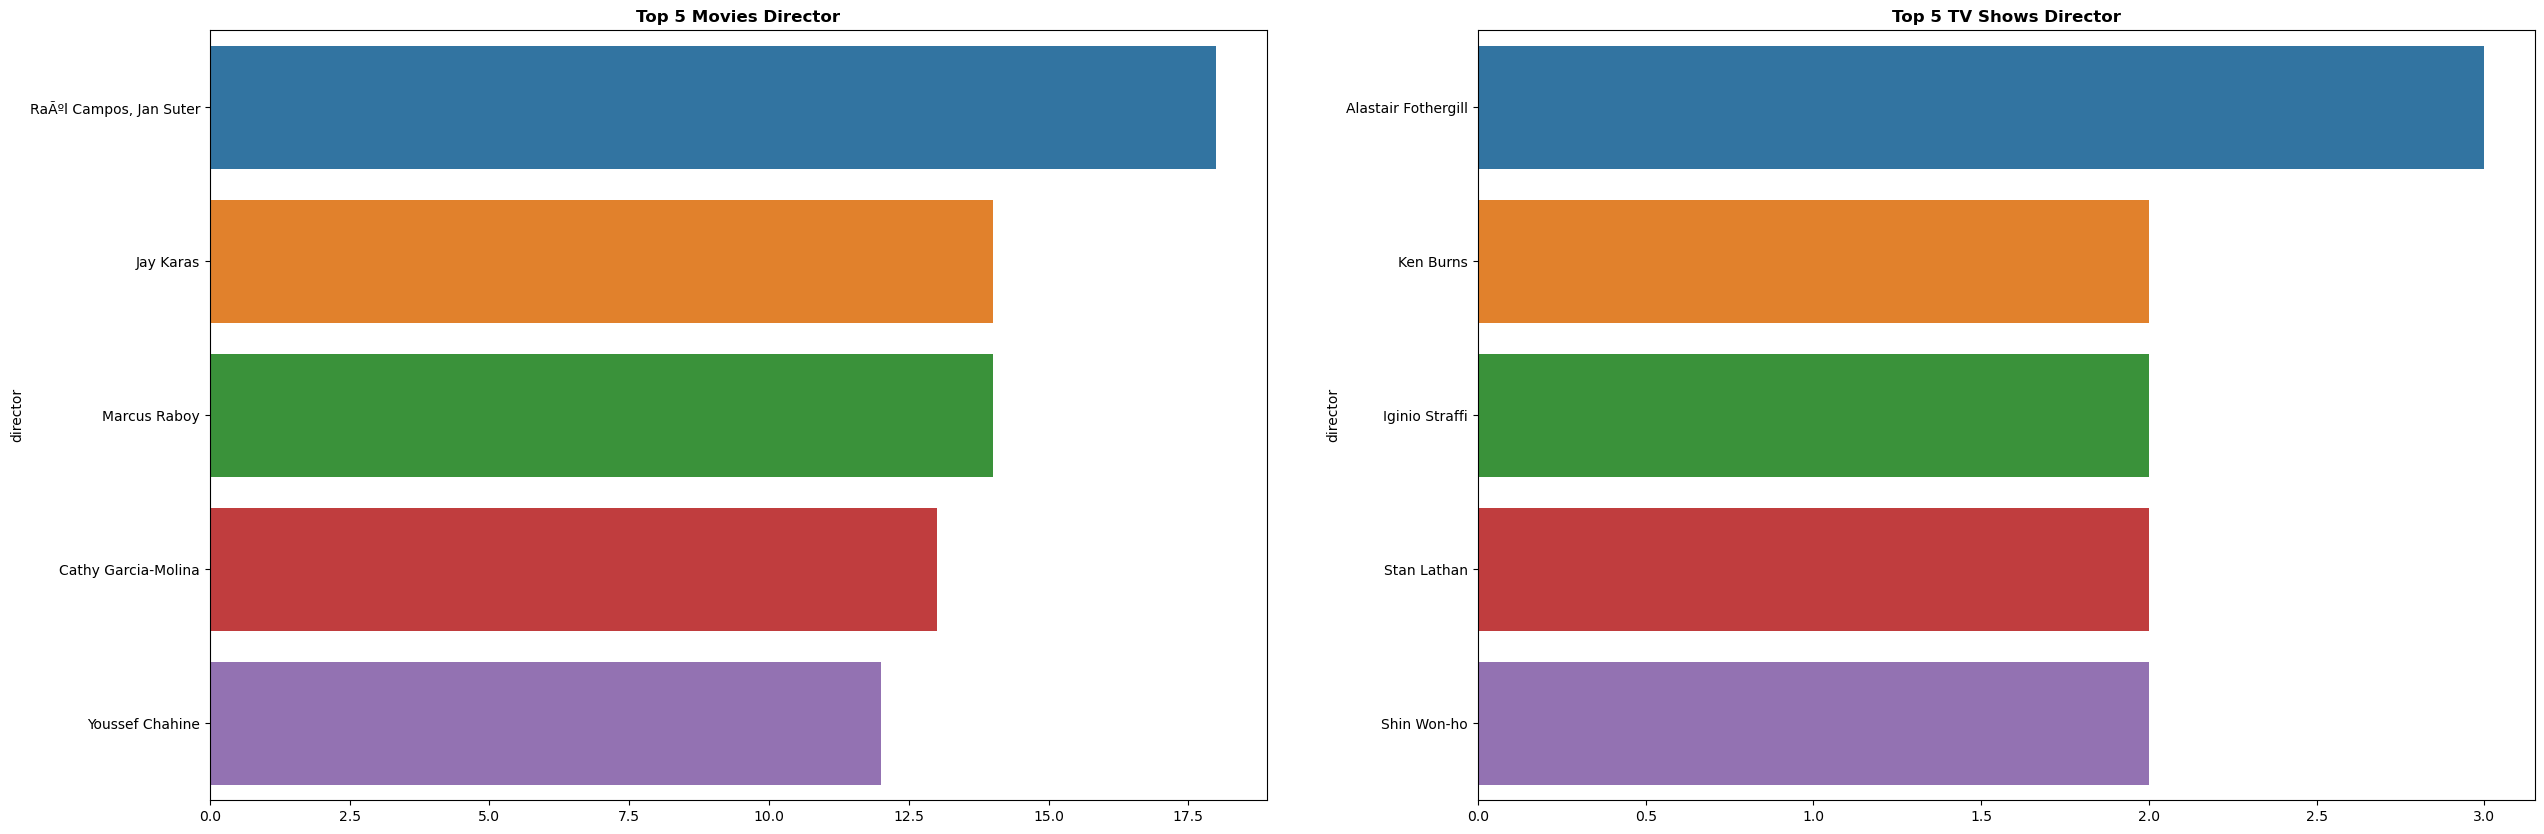

In [15]:
top_movies_director = movies.director.value_counts().nlargest(6).sort_values(ascending = False)
top_movies_director = top_movies_director.drop('unknown')

top_tv_shows_director = tv_shows.director.value_counts().nlargest(6).sort_values(ascending = False)
top_tv_shows_director = top_tv_shows_director.drop('unknown')

fig, ax = plt.subplots(1,2, figsize =(30,10))

ax[0].set_title("Top 5 Movies Director", fontweight = 'bold')
sns.barplot(data = movies, x = top_movies_director.values, y=top_movies_director.index, ax=ax[0])

ax[1].set_title("Top 5 TV Shows Director", fontweight = 'bold')
sns.barplot(data = tv_shows, x = top_tv_shows_director.values, y=top_tv_shows_director.index, ax=ax[1] )

plt.show()

What are the years in which the most movies and TV shows have been added to Netflix?

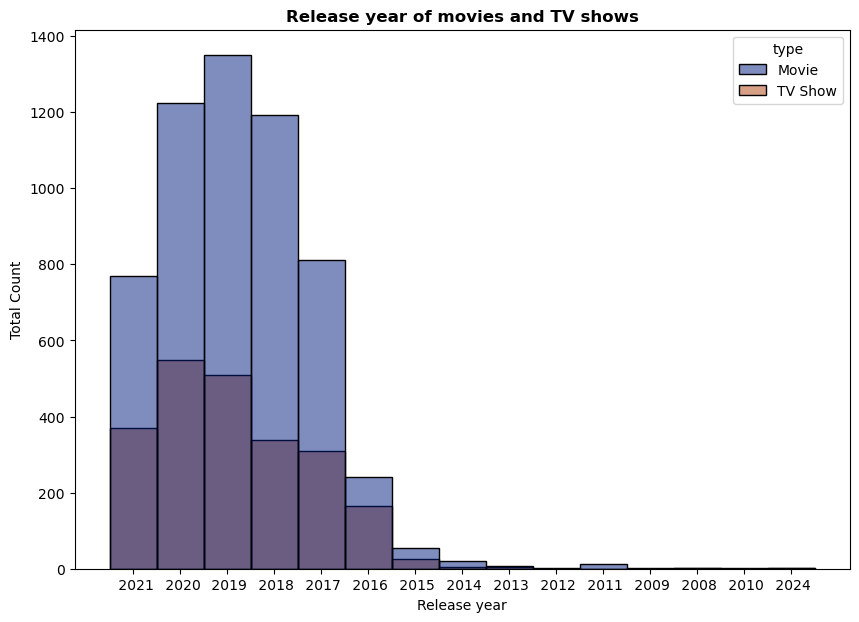

In [16]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(',')[-1])

plt.figure(figsize=(10,7))
plt.title("Release year of movies and TV shows", fontweight='bold')
plt.xlabel('Release year')
plt.ylabel('Total Count')
sns.histplot(data = df, x = df['year_added'].sort_values(ascending=False), bins=30, hue='type', palette='dark')
plt.show()

2019 is the year when we have more Movies and TV Shows added on Netflix

# What is the average duration of movie on netflix

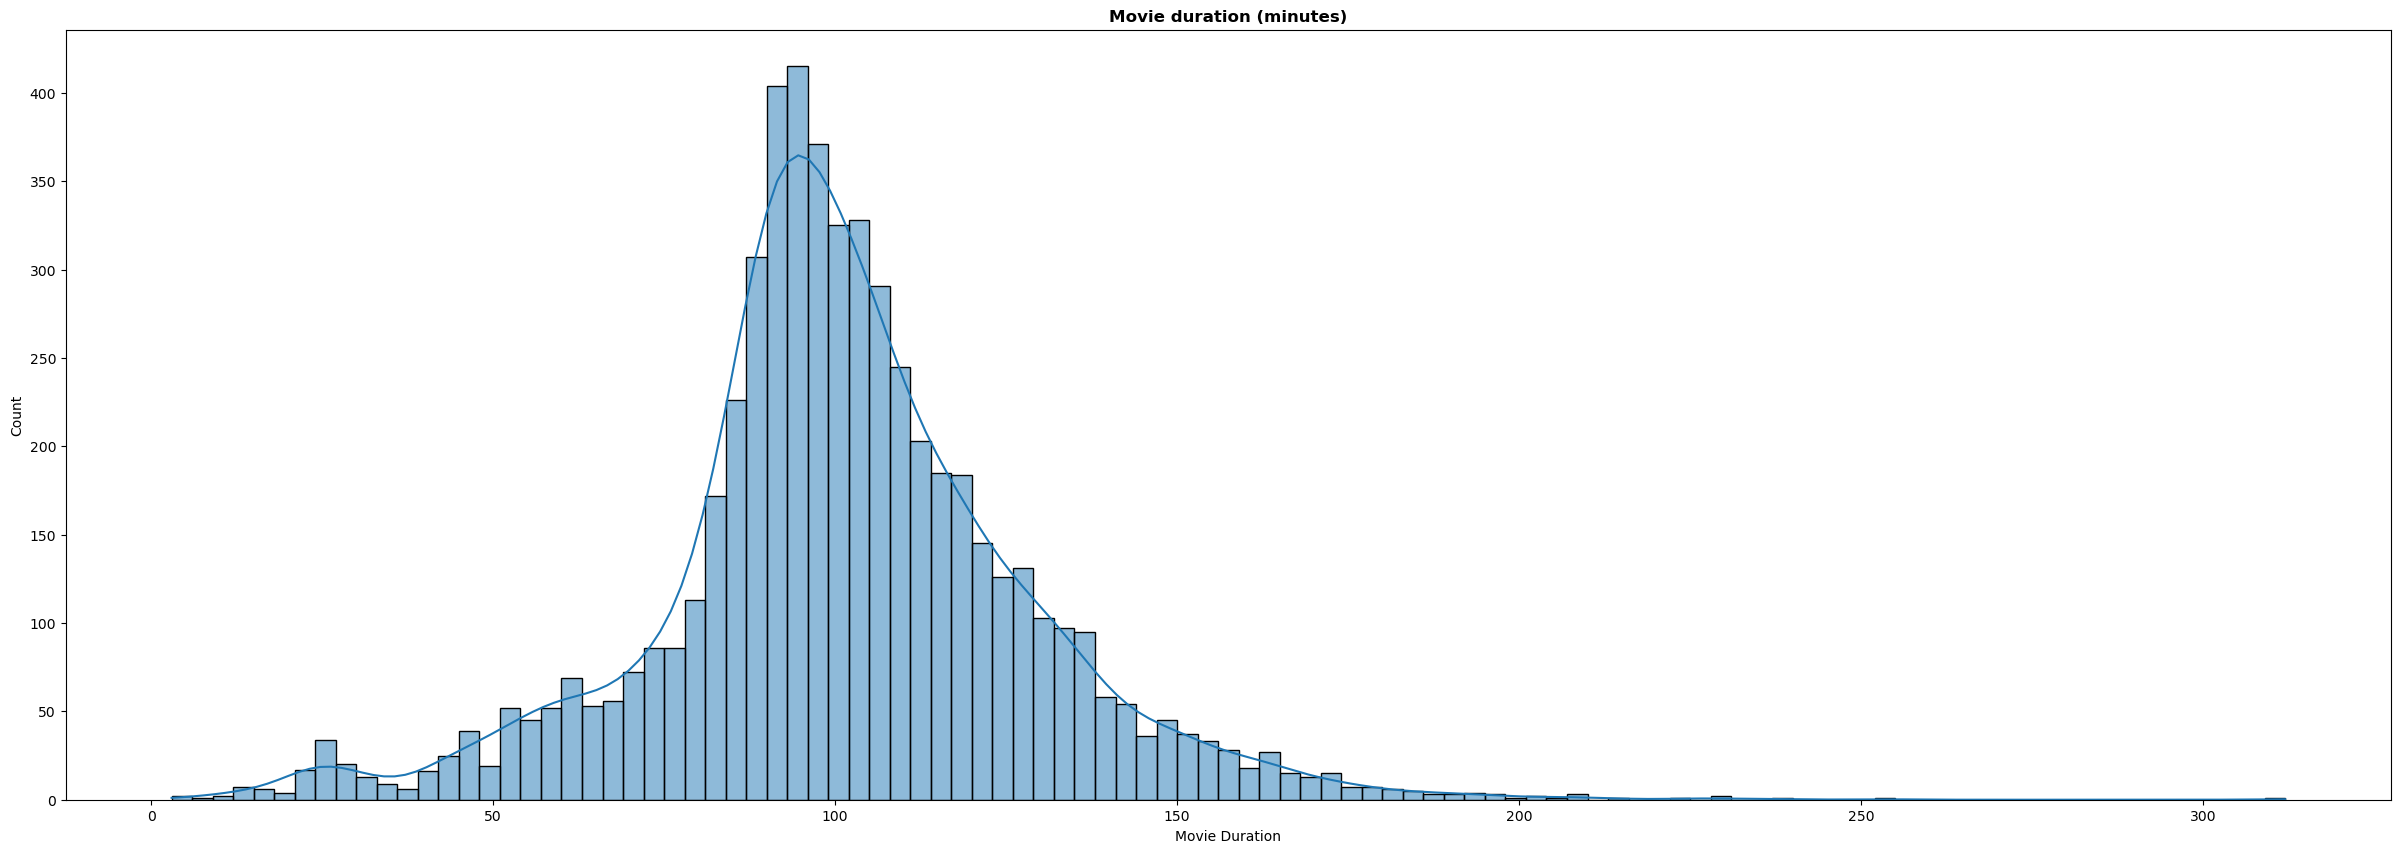

In [17]:
movie_duration = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize = (30,10))
sns.histplot(data=movie_duration, kde=True, legend = False)
plt.title('Movie duration (minutes)', fontweight='bold')
plt.xlabel('Movie Duration')

plt.show()

In [18]:
average_movie_duration = np.mean(movie_duration)

print("The Average duration of movie on Netflix is",average_movie_duration,'Minutes.')

The Average duration of movie on Netflix is 100.51969057665261 Minutes.


# What is the average duration of a TV show on Netflix?

In [19]:
tv_show_duration = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)

average_tv_show_duration = np.mean(tv_show_duration)

print("The Average duration of TV Shows on Netflix is", average_tv_show_duration, 'Seasons.')

The Average duration of TV Shows on Netflix is 1.8404395604395605 Seasons.


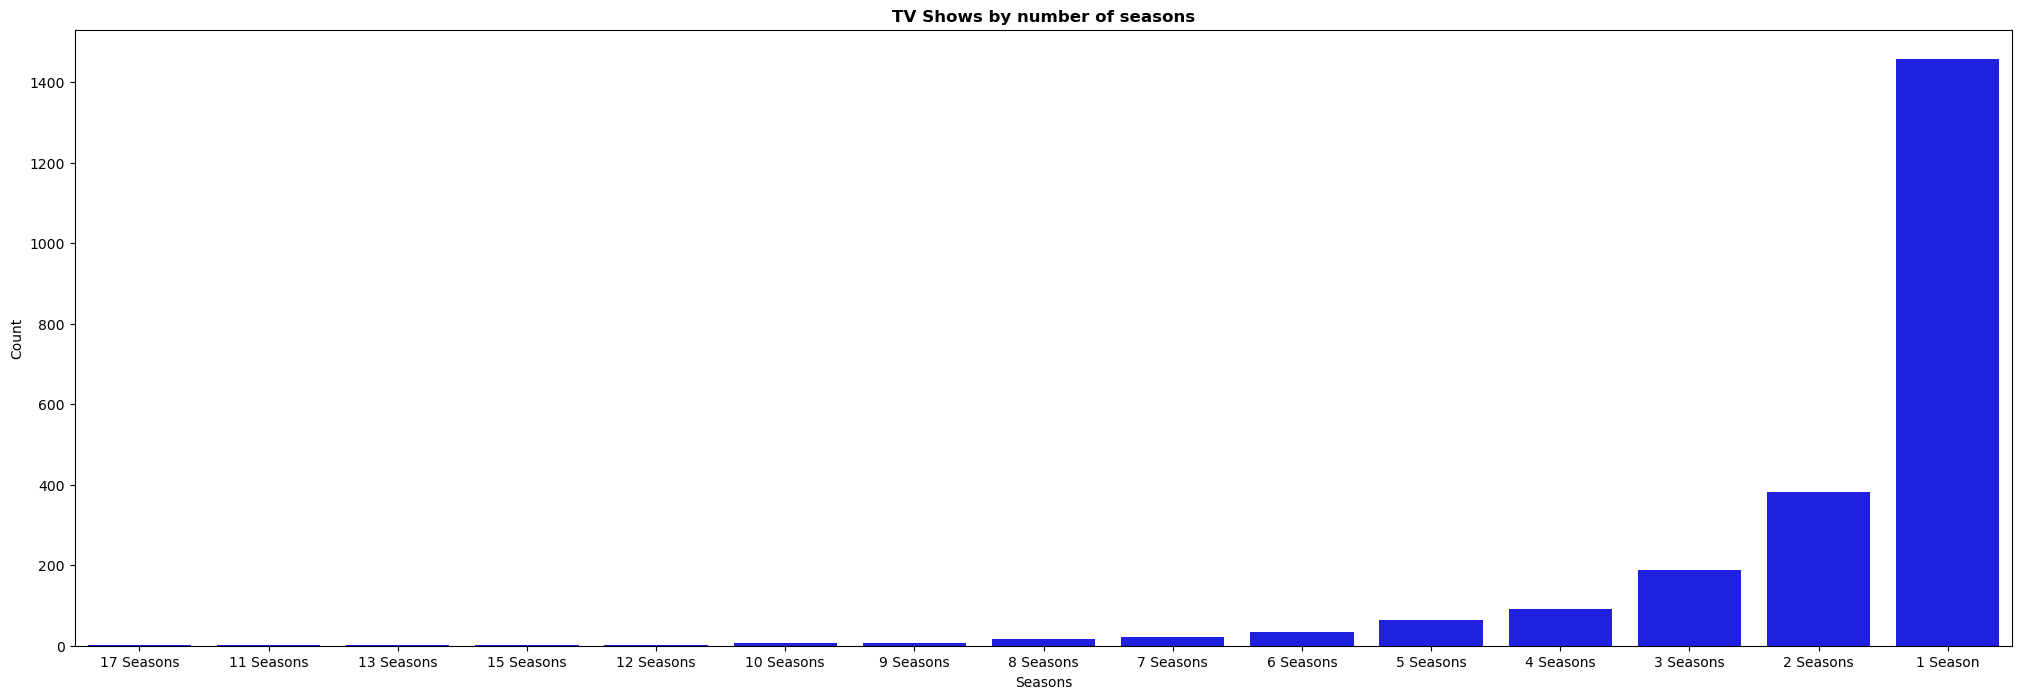

In [20]:
df_tvshow = df.loc[df['type'] == 'TV Show']

season_tvshow = df_tvshow['duration'].value_counts().sort_values(ascending = True)

plt.figure(figsize = (25, 8))
sns.barplot(x=season_tvshow.index, y=season_tvshow.values, color='blue')
plt.title('TV Shows by number of seasons', fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Seasons')

plt.show()

As we can see, TV Shows on Netflix with only 1 season are in clearly majority.